##Data Preparation

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.metrics import MeanSquaredError


In [2]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Proyek_sains_data/UAS/3_multistep_Mustivariate/dataMinyak.csv", parse_dates=["tanggal"], dayfirst=True)
data.set_index("tanggal", inplace=True)

In [3]:
data

,minyakGoreng,berasMedium,berasSuper,kursDolar
tanggal,,,,
3/1/2022,17900,11600,10500,14349.4
4/1/2022,17900,11600,10500,14341.4
5/1/2022,17900,11600,10500,14381.6
6/1/2022,17900,11650,10600,14436.8
7/1/2022,17900,11700,10600,14468.0
...,...,...,...,...
5/9/2024,17250,15300,14300,16021.7
6/9/2024,17250,15300,14300,15990.6
9/9/2024,17250,15300,14300,15943.3


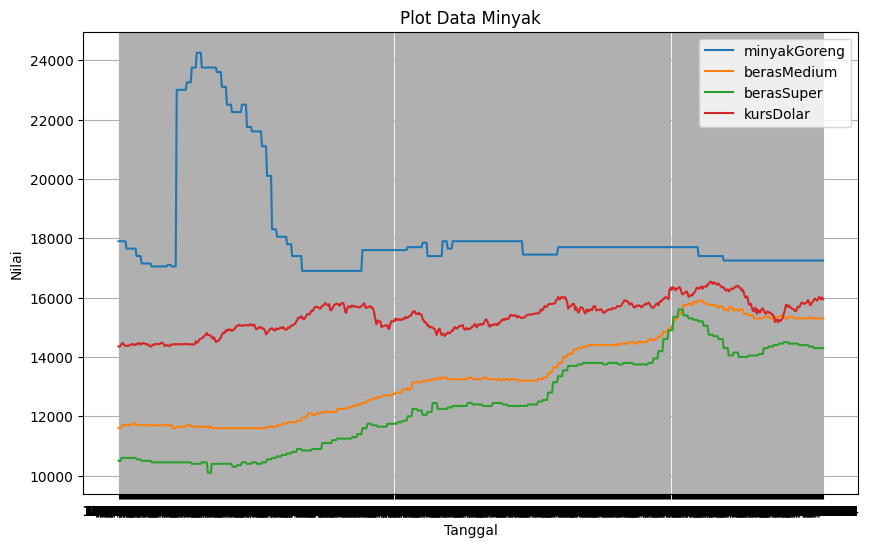

In [5]:

# Visualisasi data untuk melihat penyebarannya
plt.figure(figsize=(10, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.xlabel("Tanggal")
plt.ylabel("Nilai")
plt.title("Plot Data Minyak")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Visualisasi data mentah
print(data.head())


          minyakGoreng  berasMedium  berasSuper  kursDolar
tanggal                                                   
3/1/2022         17900        11600       10500    14349.4
4/1/2022         17900        11600       10500    14341.4
5/1/2022         17900        11600       10500    14381.6
6/1/2022         17900        11650       10600    14436.8
7/1/2022         17900        11700       10600    14468.0


In [ ]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
# Membuat sliding window
def create_sequences_multifeature(data, window_size, forecast_horizon, target_col_idx):
    X, y = [], []
    for i in range(len(data) - window_size - forecast_horizon + 1):
        X.append(data[i : i + window_size, :])  # Semua fitur
        y.append(data[i + window_size : i + window_size + forecast_horizon, target_col_idx])  # Target: minyakGoreng
    return np.array(X), np.array(y)


In [ ]:
window_size = 30
forecast_horizon = 15
target_col_idx = 0  # Target adalah "minyakGoreng"
X, y = create_sequences_multifeature(data_scaled, window_size, forecast_horizon, target_col_idx)

In [ ]:
# Split data (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (527, 30, 4), y_train shape: (527, 15)
X_test shape: (132, 30, 4), y_test shape: (132, 15)


##Model development

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,663 (201.81 KB)

 Trainable params: 51,663 (201.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0048 - va

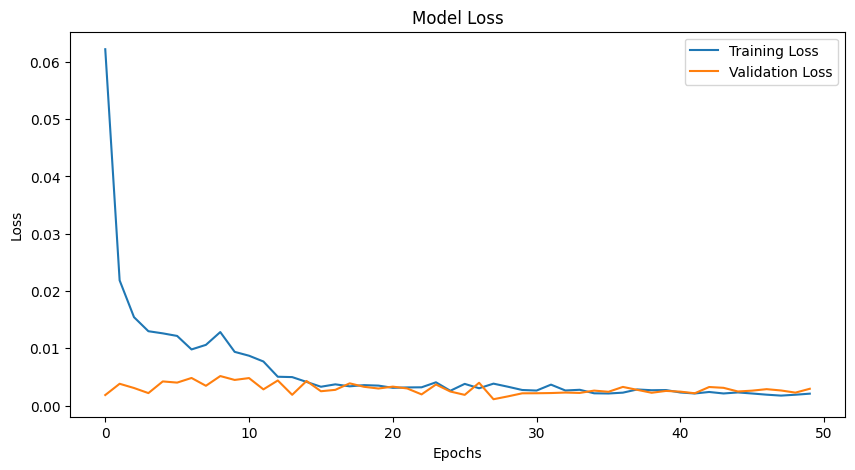

In [ ]:
# Membangun model LSTM
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(window_size, X.shape[2])),
    LSTM(64, activation='relu'),
    Dense(forecast_horizon)
])

# model.compile(optimizer='adam', loss='mse')


# Compile ulang model dengan metrik yang benar
model.compile(
    optimizer='adam',
    loss='mse',  # Menggunakan string masih diperbolehkan untuk loss
    metrics=[MeanSquaredError()]  # Untuk metrik, gunakan objek langsung
)
model.summary()

# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# model.save("model.h5")
# print("Model berhasil disimpan sebagai lstm_model.h5")

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model.save('model2.h5')


##Prediction and Evaluation

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
RMSE: 305.95005099083335


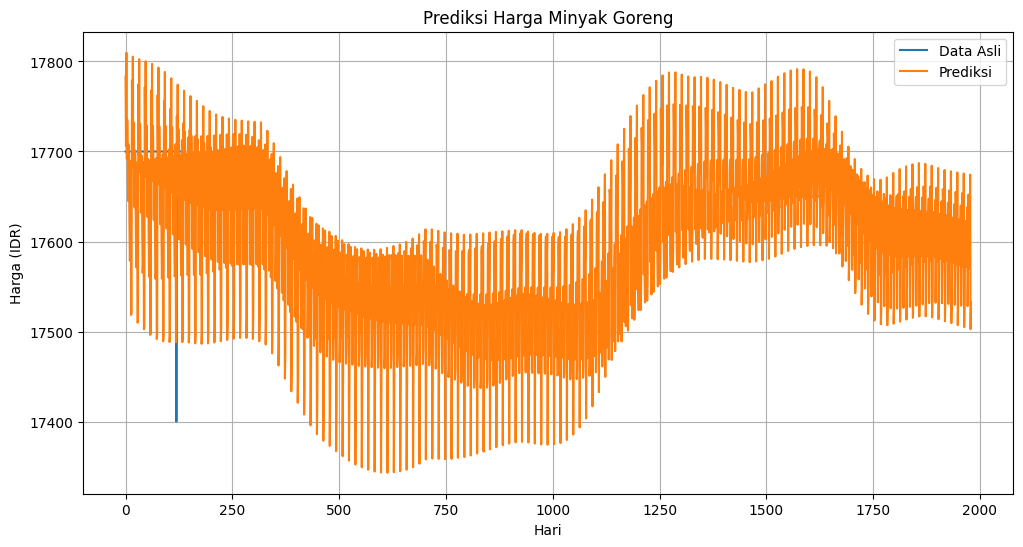

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Inversi normalisasi untuk data asli
# Reshape y_test and y_pred to have the correct number of features
y_test_reshaped = y_test.reshape(-1, 1)  # Reshape to (num_samples, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)  # Reshape to (num_samples, 1)

# Create temporary arrays with the correct number of features for inverse_transform
temp_test = np.zeros((y_test_reshaped.shape[0], data.shape[1]))
temp_pred = np.zeros((y_pred_reshaped.shape[0], data.shape[1]))

# Replace the target column with the reshaped y_test and y_pred
temp_test[:, target_col_idx] = y_test_reshaped[:, 0]
temp_pred[:, target_col_idx] = y_pred_reshaped[:, 0]

# Perform inverse_transform
y_test_inverse = scaler.inverse_transform(temp_test)[:, target_col_idx]
y_pred_inverse = scaler.inverse_transform(temp_pred)[:, target_col_idx]

# Menghitung RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
print(f"RMSE: {rmse}")

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse[:len(y_pred)], label="Data Asli")
plt.plot(y_pred_inverse, label="Prediksi")
plt.title("Prediksi Harga Minyak Goreng")
plt.xlabel("Hari")
plt.ylabel("Harga (IDR)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Menghitung MAPE
mape = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)
print(f"MAPE: {mape:.2%}")

MAPE: 1.61%


In [ ]:
# # Prediksi pada data uji
# y_pred = model.predict(X_test)

# # Inversi normalisasi untuk data asli
# y_test_inverse = scaler.inverse_transform(np.hstack([np.zeros((y_test.shape[0], data.shape[1]-1)), y_test]))[:, target_col_idx]
# y_pred_inverse = scaler.inverse_transform(np.hstack([np.zeros((y_pred.shape[0], data.shape[1]-1)), y_pred]))[:, target_col_idx]

# # Menghitung RMSE
# from sklearn.metrics import mean_squared_error
# rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
# print(f"RMSE: {rmse}")

# # Visualisasi hasil prediksi
# plt.figure(figsize=(12, 6))
# plt.plot(y_test_inverse[:len(y_pred)], label="Data Asli")
# plt.plot(y_pred_inverse, label="Prediksi")
# plt.title("Prediksi Harga Minyak Goreng")
# plt.xlabel("Hari")
# plt.ylabel("Harga (IDR)")
# plt.legend()
# plt.grid()
# plt.show()


NameError: name 'model' is not defined

In [ ]:
# # Import library
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Load dataset
# data = pd.read_csv("/content/drive/MyDrive/Proyek_sains_data/UAS/3_multistep_Mustivariate/dataMinyak.csv", parse_dates=["tanggal"], dayfirst=True)
# data.set_index("tanggal", inplace=True)

# # Visualisasi data mentah
# print(data.head())

# # Normalisasi data
# scaler = MinMaxScaler(feature_range=(0, 1))
# data_scaled = scaler.fit_transform(data)

# # Membuat sliding window
# def create_sequences_multifeature(data, window_size, forecast_horizon, target_col_idx):
#     X, y = [], []
#     for i in range(len(data) - window_size - forecast_horizon + 1):
#         X.append(data[i : i + window_size, :])  # Semua fitur
#         y.append(data[i + window_size : i + window_size + forecast_horizon, target_col_idx])  # Target: minyakGoreng
#     return np.array(X), np.array(y)

# window_size = 30
# forecast_horizon = 15
# target_col_idx = 0  # Target adalah "minyakGoreng"
# X, y = create_sequences_multifeature(data_scaled, window_size, forecast_horizon, target_col_idx)

# # Split data (80% training, 20% testing)
# train_size = int(0.8 * len(X))
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
# print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


           minyakGoreng berasMedium berasSuper  kursDolar
tanggal                                                  
2022-01-03       17,900      11,600     10,500    14349.4
2022-01-04       17,900      11,600     10,500    14341.4
2022-01-05       17,900      11,600     10,500    14381.6
2022-01-06       17,900      11,650     10,600    14436.8
2022-01-07       17,900      11,700     10,600    14468.0


ValueError: could not convert string to float: '17,900'